## Setup

In [1]:
!pip install mlflow

In [2]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import applications
import mlflow

In [3]:
# Connect to google drive 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!unzip "/content/drive/My Drive/dataset 224x224 fully-built-test [ALL sets + bonsai].zip" -d "/content/"

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_306.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_308.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_310.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_312.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_314.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_316.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_318.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_32.jpg  
  inflating: /content/dataset 224x224 fully-built-test [ALL sets + bonsai]/test/21034/frame_320.jpg  
  inflating: /content/

In [5]:
!unzip "/content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_15_no_bonsai.zip" -d "/content/siamese_model"

Archive:  /content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_15_no_bonsai.zip
   creating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/
  inflating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/python_env.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/conda.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/MLmodel  
   creating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/
 extracting: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/save_format.txt  
   creating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/model/
   creating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/model/variables/
  inflating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/model/variables/variables.data-00000-of-00001  
  inflating: /content/siamese_model/siamese_enet_fully_15_no_bonsai/data/model/variables/variables.index  
  inflating: /content/siamese

In [6]:
!unzip "/content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_230_no_bonsai.zip" -d "/content/siamese_model"

Archive:  /content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_230_no_bonsai.zip
   creating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/
  inflating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/python_env.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/conda.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/MLmodel  
   creating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/
 extracting: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/save_format.txt  
   creating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/model/
   creating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/model/variables/
  inflating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/model/variables/variables.data-00000-of-00001  
  inflating: /content/siamese_model/siamese_enet_fully_230_no_bonsai/data/model/variables/variables.index  
  inflating: /cont

In [21]:
!unzip "/content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_15_bonsai.zip" -d "/content/siamese_model"

Archive:  /content/drive/My Drive/Bachelor Project/Models/siamese_enet_fully_15_bonsai.zip
   creating: /content/siamese_model/siamese_enet_fully_15_bonsai/
  inflating: /content/siamese_model/siamese_enet_fully_15_bonsai/python_env.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_15_bonsai/conda.yaml  
  inflating: /content/siamese_model/siamese_enet_fully_15_bonsai/MLmodel  
   creating: /content/siamese_model/siamese_enet_fully_15_bonsai/data/
 extracting: /content/siamese_model/siamese_enet_fully_15_bonsai/data/save_format.txt  
   creating: /content/siamese_model/siamese_enet_fully_15_bonsai/data/model/
   creating: /content/siamese_model/siamese_enet_fully_15_bonsai/data/model/variables/
  inflating: /content/siamese_model/siamese_enet_fully_15_bonsai/data/model/variables/variables.data-00000-of-00001  
  inflating: /content/siamese_model/siamese_enet_fully_15_bonsai/data/model/variables/variables.index  
  inflating: /content/siamese_model/siamese_enet_fully_15_bons

## Load dataset

In [15]:
from numpy.random.mtrand import shuffle
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_directory = 'dataset 224x224 fully-built-test [ALL sets + bonsai]'

test_it = image_dataset_from_directory(f'/content/{dataset_directory}/test/', label_mode='int', batch_size=1, shuffle=True, image_size=(224, 224), seed=42)

# No need to preprocess for the CNN
test_it = test_it.map(lambda x, y: (applications.efficientnet_v2.preprocess_input(x), y))

Found 5400 files belonging to 18 classes.


In [16]:
len(test_it)

5400

In [17]:
# Take a subset of the training data
NUM_IMAGES = 1000 #len(test_it) # 1000 for only testing the bonsai usually.  previously 300
test_it = test_it.take(NUM_IMAGES) 

In [18]:
x_test = []
y_test = []
    
for image, label in test_it:
    x_test.append(image[0])
    y_test.append(label[0])

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype(np.float32)

In [19]:
len(y_test)

1000

## Load model

In [20]:
# Define constrastive loss
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

  Arguments:
      margin: Integer, defines the baseline for distance for which pairs
              should be classified as dissimilar. - (default is 1).

  Returns:
      'constrastive_loss' function with data ('margin') attached.
  """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

      Arguments:
          y_true: List of labels, each label is of type float32.
          y_pred: List of predictions of same length as of y_true,
                  each label is of type float32.

      Returns:
          A tensor containing constrastive loss as floating point value.
      """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

model_15_examples_no_bonsai = mlflow.keras.load_model('/content/siamese_model/siamese_enet_fully_15_no_bonsai', custom_objects={"contrastive_loss": loss(margin=1) })
#model_60_examples_no_bonsai = mlflow.keras.load_model('/content/siamese_model/siamese_enet_fully_230_no_bonsai', custom_objects={"contrastive_loss": loss(margin=1) })
model_15_examples_with_bonsai = mlflow.keras.load_model('/content/siamese_model/siamese_enet_fully_15_bonsai', custom_objects={"contrastive_loss": loss(margin=1) })

## Testing

### Setup

In [10]:
# Function to perform n-way testing
def create_n_way_set(model, x, y, n_way=5):
  num_classes = max(y) + 1
  # Return an array of arrays that each hold all the images for a unique class [ [one_class_img, one_class_img, ....], [second_class_img, second_class_img ...], ... ]
  digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

  pairs = []
  labels = []
  count = 0

  correct = 0
  false = 0

  for idx1 in range(len(x)):
    # If there is no matching example, then add one
    if count == 0:
      x1 = x[idx1]
      label1 = y[idx1]
      idx2 = np.random.choice(digit_indices[label1])
      x2 = x[idx2]

      pairs += [[x1, x2]]
      labels += [1]
    elif count < n_way:
      # Add a non-matching example
      label2 = np.random.randint(0, num_classes - 1)
      while label2 == label1:
          label2 = np.random.randint(0, num_classes - 1)

      idx2 = np.random.choice(digit_indices[label2])
      x2 = x[idx2]

      pairs += [[x1, x2]]
      labels += [0]
    else:
      count = 0
      # Split the pairs
      pairs = np.array(pairs)
      labels = np.array(labels)
      x_n_way_test_1 = pairs[:, 0]
      x_n_way_test_2 = pairs[:, 1]
      predictions = model.predict([x_n_way_test_1, x_n_way_test_2])
      highest_prediction = np.max(predictions)
      index = np.where(predictions == highest_prediction)[0][0]
      if index == 0:
        correct += 1
        #print("Correct")
      else:
        false += 1
        #print("Incorrect")
      #break
      continue

    count += 1
  #print(f"Correct: {correct}")
  #print(f"False: {false}")
  # percent_correct = (100 * n_correct) / k
  k = correct + false
  percent_correct = (100 * correct) / k
  #print(f"Percent Correct: {percent_correct}")
  return percent_correct
  #return np.array(pairs), np.array(labels).astype("float32")


In [11]:
# Function to perform n-way testing
def test_n_way_one_shot_learning(model, x, y, n_way=5, debug=False):
  num_classes = max(y) + 1
  # Return an array of arrays that each hold all the images for a unique class [ [one_class_img, one_class_img, ....], [second_class_img, second_class_img ...], ... ]
  digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

  correct = 0
  false = 0

  for idx1 in range(len(x)):
    # This is one n-way one shot classification test
    pairs = []
    labels = []

    # If there is no matching example, then add one
    x1 = x[idx1]
    label1 = y[idx1]
    idx2 = np.random.choice(digit_indices[label1])
    x2 = x[idx2]

    pairs += [[x1, x2]]
    labels += [1]
    
    if debug:
      print(f"Matching example label: {label1}")

    # Add up to n non matching examples
    for i in range(n_way-1):
      # Add a non-matching example
      label2 = np.random.randint(0, num_classes - 1)
      while label2 == label1:
          label2 = np.random.randint(0, num_classes - 1)

      if debug:
        print(f"Non-matching example label: {label2}")

      idx2 = np.random.choice(digit_indices[label2])
      x2 = x[idx2]

      pairs += [[x1, x2]]
      labels += [0]

    # Split the pairs
    pairs = np.array(pairs)
    labels = np.array(labels)
    x_n_way_test_1 = pairs[:, 0]
    x_n_way_test_2 = pairs[:, 1]
    predictions = model.predict([x_n_way_test_1, x_n_way_test_2])
    highest_prediction = np.max(predictions)
    index = np.where(predictions == highest_prediction)[0][0]
    if debug:
      print(f"Pairs shape: {pairs.shape}")
      print(f"Labels: {labels}")
      print(f"Predictions: {predictions}")
      print(f"highest_prediction: {highest_prediction}")
      print(f"Index: {index}")

    if index == 0:
      correct = correct + 1
      if debug:
        print("Correct")
    else:
      false = false + 1
      if debug:
        print("Incorrect")
  
  print(f"Correct: {correct}")
  print(f"Incorrect: {false}")
  k = correct + false
  print(f"Number of samples: {k}")
  percent_correct = (100 * correct) / k
  
  return percent_correct
  


In [ ]:
test_n_way_one_shot_learning(x_test, y_test, n_way=2, debug=True)

Matching example label: 3
Non-matching example label: 5
Pairs shape: (2, 2, 224, 224, 3)
Labels: [1 0]
Predictions: [[0.99883384]
 [0.01539952]]
highest_prediction: 0.9988338351249695
Index: 0
Correct
Matching example label: 4
Non-matching example label: 14
Pairs shape: (2, 2, 224, 224, 3)
Labels: [1 0]
Predictions: [[0.9988278 ]
 [0.01346996]]
highest_prediction: 0.9988278150558472
Index: 0
Correct
Matching example label: 15
Non-matching example label: 16
Pairs shape: (2, 2, 224, 224, 3)
Labels: [1 0]
Predictions: [[0.99883384]
 [0.00352556]]
highest_prediction: 0.9988338351249695
Index: 0
Correct
Matching example label: 7
Non-matching example label: 11
Pairs shape: (2, 2, 224, 224, 3)
Labels: [1 0]
Predictions: [[0.99883384]
 [0.00949699]]
highest_prediction: 0.9988338351249695
Index: 0
Correct
Matching example label: 5
Non-matching example label: 7
Pairs shape: (2, 2, 224, 224, 3)
Labels: [1 0]
Predictions: [[0.02397808]
 [0.998832  ]]
highest_prediction: 0.9988319873809814
Index: 1

89.0

## N-way tests

In [15]:
num_trials = 1 # Maybe start at 10 trials and start at 2 n-way instead of 1 as in 1 we will always get 100
k = [2, 4, 5, 8, 13, 21, 34, 55] # 2, 3, 4, 5, 8, 13, 21, 34, 55, 89, 144

print(f"Testing model_15_examples_no_bonsai")

for i in k:
    print("=====================")
    print(f"Testing n-way: {i}")
    percentages_correct = []
    # Test it num_trial times and take the average
    for j in range(num_trials):
        percent_correct = test_n_way_one_shot_learning(model_15_examples_no_bonsai, x_test, y_test, n_way=i)
        percentages_correct.append(percent_correct)
    stnd_dv = np.std(percentages_correct)
    mean = np.mean(percentages_correct)
    avg = np.average(percentages_correct)
    print(f"Average percent correct over {num_trials} trials: {avg}% +- {stnd_dv}")

Testing model_15_examples_no_bonsai
Testing n-way: 2
Correct: 196
Incorrect: 4
Number of samples: 200
Average percent correct over 1 trials: 98.0% +- 0.0
Testing n-way: 4
Correct: 194
Incorrect: 6
Number of samples: 200
Average percent correct over 1 trials: 97.0% +- 0.0
Testing n-way: 5
Correct: 191
Incorrect: 9
Number of samples: 200
Average percent correct over 1 trials: 95.5% +- 0.0
Testing n-way: 8
Correct: 193
Incorrect: 7
Number of samples: 200
Average percent correct over 1 trials: 96.5% +- 0.0
Testing n-way: 13
Correct: 185
Incorrect: 15
Number of samples: 200
Average percent correct over 1 trials: 92.5% +- 0.0
Testing n-way: 21
Correct: 183
Incorrect: 17
Number of samples: 200
Average percent correct over 1 trials: 91.5% +- 0.0
Testing n-way: 34
Correct: 183
Incorrect: 17
Number of samples: 200
Average percent correct over 1 trials: 91.5% +- 0.0
Testing n-way: 55
Correct: 174
Incorrect: 26
Number of samples: 200
Average percent correct over 1 trials: 87.0% +- 0.0


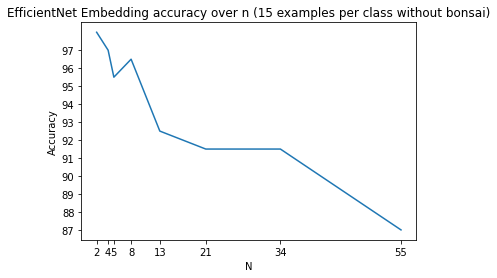

In [19]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 98.0, 97.0, 95.5, 96.5, 92.5, 91.5, 91.5, 87.0 ])
 
 # siamese_enet_fully_15_no_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 1))
plt.plot(x, y)
plt.title("EfficientNet Embedding accuracy over n (15 examples per class without bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

In [16]:
num_trials = 1 # Maybe start at 10 trials and start at 2 n-way instead of 1 as in 1 we will always get 100
k = [2, 4, 5, 8, 13, 21, 34, 55] # 2, 3, 4, 5, 8, 13, 21, 34, 55, 89, 144

print(f"Testing model_230_examples_no_bonsai")

for i in k:
    print("=====================")
    print(f"Testing n-way: {i}")
    percentages_correct = []
    # Test it num_trial times and take the average
    for j in range(num_trials):
        percent_correct = test_n_way_one_shot_learning(model_60_examples_no_bonsai, x_test, y_test, n_way=i)
        percentages_correct.append(percent_correct)
    stnd_dv = np.std(percentages_correct)
    mean = np.mean(percentages_correct)
    avg = np.average(percentages_correct)
    print(f"Average percent correct over {num_trials} trials: {avg}% +- {stnd_dv}")

Testing model_230_examples_no_bonsai
Testing n-way: 2
Correct: 200
Incorrect: 0
Number of samples: 200
Average percent correct over 1 trials: 100.0% +- 0.0
Testing n-way: 4
Correct: 193
Incorrect: 7
Number of samples: 200
Average percent correct over 1 trials: 96.5% +- 0.0
Testing n-way: 5
Correct: 193
Incorrect: 7
Number of samples: 200
Average percent correct over 1 trials: 96.5% +- 0.0
Testing n-way: 8
Correct: 189
Incorrect: 11
Number of samples: 200
Average percent correct over 1 trials: 94.5% +- 0.0
Testing n-way: 13
Correct: 188
Incorrect: 12
Number of samples: 200
Average percent correct over 1 trials: 94.0% +- 0.0
Testing n-way: 21
Correct: 186
Incorrect: 14
Number of samples: 200
Average percent correct over 1 trials: 93.0% +- 0.0
Testing n-way: 34
Correct: 181
Incorrect: 19
Number of samples: 200
Average percent correct over 1 trials: 90.5% +- 0.0
Testing n-way: 55
Correct: 178
Incorrect: 22
Number of samples: 200
Average percent correct over 1 trials: 89.0% +- 0.0


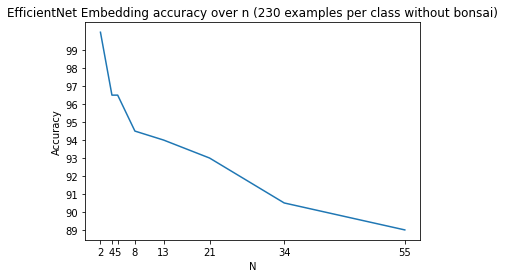

In [20]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 100, 96.5, 96.5, 94.5, 94.0, 93.0, 90.5, 89.0 ])
 
 # siamese_enet_fully_230_no_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 1))
plt.plot(x, y)
plt.title("EfficientNet Embedding accuracy over n (230 examples per class without bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

In [13]:
num_trials = 1 # Maybe start at 10 trials and start at 2 n-way instead of 1 as in 1 we will always get 100
k = [2, 4, 5, 8, 13, 21, 34, 55] # 2, 3, 4, 5, 8, 13, 21, 34, 55, 89, 144

print(f"Testing model_15_examples_with_bonsai")

for i in k:
    print("=====================")
    print(f"Testing n-way: {i}")
    percentages_correct = []
    # Test it num_trial times and take the average
    for j in range(num_trials):
        percent_correct = test_n_way_one_shot_learning(model_15_examples_with_bonsai, x_test, y_test, n_way=i)
        percentages_correct.append(percent_correct)
    stnd_dv = np.std(percentages_correct)
    mean = np.mean(percentages_correct)
    avg = np.average(percentages_correct)
    print(f"Average percent correct over {num_trials} trials: {avg}% +- {stnd_dv}")

Testing model_15_examples_with_bonsai
Testing n-way: 2
Correct: 199
Incorrect: 1
Number of samples: 200
Average percent correct over 1 trials: 99.5% +- 0.0
Testing n-way: 4
Correct: 196
Incorrect: 4
Number of samples: 200
Average percent correct over 1 trials: 98.0% +- 0.0
Testing n-way: 5
Correct: 192
Incorrect: 8
Number of samples: 200
Average percent correct over 1 trials: 96.0% +- 0.0
Testing n-way: 8
Correct: 190
Incorrect: 10
Number of samples: 200
Average percent correct over 1 trials: 95.0% +- 0.0
Testing n-way: 13
Correct: 187
Incorrect: 13
Number of samples: 200
Average percent correct over 1 trials: 93.5% +- 0.0
Testing n-way: 21
Correct: 185
Incorrect: 15
Number of samples: 200
Average percent correct over 1 trials: 92.5% +- 0.0
Testing n-way: 34
Correct: 182
Incorrect: 18
Number of samples: 200
Average percent correct over 1 trials: 91.0% +- 0.0
Testing n-way: 55
Correct: 176
Incorrect: 24
Number of samples: 200
Average percent correct over 1 trials: 88.0% +- 0.0


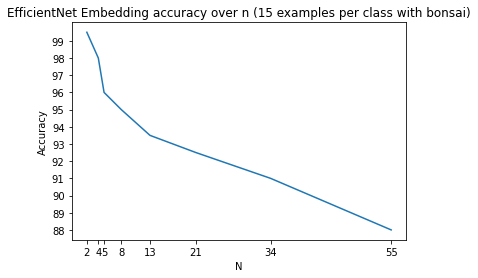

In [14]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 99.5, 98.0, 96.0, 95.0, 93.5, 92.5, 91.0, 88.0 ])
              #98.0, 97.0, 95.5, 96.5, 92.5, 91.5, 91.5, 87.0 # 15 examples WITHOUT bonsai
 # siamese_enet_fully_15_with_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 1))
plt.plot(x, y)
plt.title("EfficientNet Embedding accuracy over n (15 examples per class with bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

## Test the model on only the Bonsai set

In [21]:
# Function to perform n-way testing
def test_bonsai(model, x, y, n_way=5, debug=False):
  num_classes = max(y) + 1
  # Return an array of arrays that each hold all the images for a unique class [ [one_class_img, one_class_img, ....], [second_class_img, second_class_img ...], ... ]
  digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

  correct = 0
  false = 0

  for idx1 in range(len(x)):
    # This is one n-way one shot classification test
    pairs = []
    labels = []

    # If there is no matching example, then add one
    x1 = x[idx1]
    label1 = y[idx1]

    # If the label is not 0 which is the set 10281 which is bonsai then go to the next one
    if label1 != 0:
      continue


    idx2 = np.random.choice(digit_indices[label1])
    x2 = x[idx2]

    pairs += [[x1, x2]]
    labels += [1]
    
    if debug:
      print(f"Matching example label: {label1}")

    # Add up to n non matching examples
    for i in range(n_way-1):
      # Add a non-matching example
      label2 = np.random.randint(0, num_classes - 1)
      while label2 == label1:
          label2 = np.random.randint(0, num_classes - 1)

      if debug:
        print(f"Non-matching example label: {label2}")

      idx2 = np.random.choice(digit_indices[label2])
      x2 = x[idx2]

      pairs += [[x1, x2]]
      labels += [0]

    # Split the pairs
    pairs = np.array(pairs)
    labels = np.array(labels)
    x_n_way_test_1 = pairs[:, 0]
    x_n_way_test_2 = pairs[:, 1]
    predictions = model.predict([x_n_way_test_1, x_n_way_test_2])
    highest_prediction = np.max(predictions)
    index = np.where(predictions == highest_prediction)[0][0]
    if debug:
      print(f"Pairs shape: {pairs.shape}")
      print(f"Labels: {labels}")
      print(f"Predictions: {predictions}")
      print(f"highest_prediction: {highest_prediction}")
      print(f"Index: {index}")

    if index == 0:
      correct = correct + 1
      if debug:
        print("Correct")
    else:
      false = false + 1
      if debug:
        print("Incorrect")
  
  print(f"Correct: {correct}")
  print(f"Incorrect: {false}")
  k = correct + false
  print(f"Number of samples: {k}")
  percent_correct = (100 * correct) / k
  
  return percent_correct
  


In [ ]:
test_bonsai(model, x_test, y_test, n_way=4, debug=True)

In [22]:
num_trials = 1 # Maybe start at 10 trials and start at 2 n-way instead of 1 as in 1 we will always get 100
k = [2, 4, 5, 8, 13, 21, 34, 55] # 2, 3, 4, 5, 8, 13, 21, 34, 55, 89, 144

print("Testing Model trained WITHOUT Bonsai in example")

for i in k:
    print("=====================")
    print(f"Testing bonsai predictions n-way: {i}")
    percentages_correct = []
    # Test it num_trial times and take the average
    for j in range(num_trials):
        percent_correct = test_bonsai(model_15_examples_no_bonsai, x_test, y_test, n_way=i)
        percentages_correct.append(percent_correct)
    stnd_dv = np.std(percentages_correct)
    mean = np.mean(percentages_correct)
    avg = np.average(percentages_correct)
    print(f"Average percent correct over {num_trials} trials: {avg}% +- {stnd_dv}")

Testing Model trained WITHOUT Bonsai in example
Testing bonsai predictions n-way: 2
Correct: 65
Incorrect: 2
Number of samples: 67
Average percent correct over 1 trials: 97.01492537313433% +- 0.0
Testing bonsai predictions n-way: 4
Correct: 57
Incorrect: 10
Number of samples: 67
Average percent correct over 1 trials: 85.07462686567165% +- 0.0
Testing bonsai predictions n-way: 5
Correct: 58
Incorrect: 9
Number of samples: 67
Average percent correct over 1 trials: 86.56716417910448% +- 0.0
Testing bonsai predictions n-way: 8
Correct: 48
Incorrect: 19
Number of samples: 67
Average percent correct over 1 trials: 71.64179104477611% +- 0.0
Testing bonsai predictions n-way: 13
Correct: 40
Incorrect: 27
Number of samples: 67
Average percent correct over 1 trials: 59.701492537313435% +- 0.0
Testing bonsai predictions n-way: 21
Correct: 35
Incorrect: 32
Number of samples: 67
Average percent correct over 1 trials: 52.23880597014925% +- 0.0
Testing bonsai predictions n-way: 34
Correct: 27
Incorrec

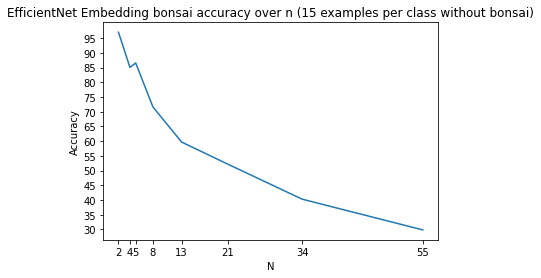

In [26]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 97.01, 85.07, 86.56, 71.64, 59.70, 52.23, 40.29, 29.85 ])

# model_15_examples_no_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 5))
plt.plot(x, y)
plt.title("EfficientNet Embedding bonsai accuracy over n (15 examples per class without bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

In [23]:
num_trials = 1 # Maybe start at 10 trials and start at 2 n-way instead of 1 as in 1 we will always get 100
k = [2, 4, 5, 8, 13, 21, 34, 55] # 2, 3, 4, 5, 8, 13, 21, 34, 55, 89, 144

print("Testing Model trained WITH Bonsai in example")

for i in k:
    print("=====================")
    print(f"Testing bonsai predictions n-way: {i}")
    percentages_correct = []
    # Test it num_trial times and take the average
    for j in range(num_trials):
        percent_correct = test_bonsai(model_15_examples_with_bonsai, x_test, y_test, n_way=i)
        percentages_correct.append(percent_correct)
    stnd_dv = np.std(percentages_correct)
    mean = np.mean(percentages_correct)
    avg = np.average(percentages_correct)
    print(f"Average percent correct over {num_trials} trials: {avg}% +- {stnd_dv}")

Testing Model trained WITH Bonsai in example
Testing bonsai predictions n-way: 2
Correct: 65
Incorrect: 2
Number of samples: 67
Average percent correct over 1 trials: 97.01492537313433% +- 0.0
Testing bonsai predictions n-way: 4
Correct: 61
Incorrect: 6
Number of samples: 67
Average percent correct over 1 trials: 91.04477611940298% +- 0.0
Testing bonsai predictions n-way: 5
Correct: 62
Incorrect: 5
Number of samples: 67
Average percent correct over 1 trials: 92.53731343283582% +- 0.0
Testing bonsai predictions n-way: 8
Correct: 49
Incorrect: 18
Number of samples: 67
Average percent correct over 1 trials: 73.13432835820896% +- 0.0
Testing bonsai predictions n-way: 13
Correct: 48
Incorrect: 19
Number of samples: 67
Average percent correct over 1 trials: 71.64179104477611% +- 0.0
Testing bonsai predictions n-way: 21
Correct: 21
Incorrect: 46
Number of samples: 67
Average percent correct over 1 trials: 31.34328358208955% +- 0.0
Testing bonsai predictions n-way: 34
Correct: 31
Incorrect: 36

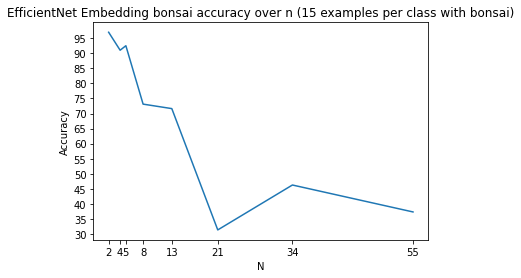

In [27]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 97.01, 91.04, 92.53, 73.13, 71.64, 31.34, 46.26, 37.31 ])
            #  97.01, 85.07, 86.56, 71.64, 59.70, 52.23, 40.29, 29.85 # With no bonsai results
# model_15_examples_no_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 5))
plt.plot(x, y)
plt.title("EfficientNet Embedding bonsai accuracy over n (15 examples per class with bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Plot the curves

 
# Dataset
x = np.array([ 2,  4,  5,  8,  13,  21,  34, 55 ])
y = np.array([ 99.0, 96.33, 95.0, 94.33, 93.0, 89.0, 89.33, 89.66 ])
 
 # siamese_enet_fully_15_no_bonsai

# Plotting the Graph
plt.xticks(x)
plt.yticks(np.arange(0, max(y), 2))
plt.plot(x, y)
plt.title("EfficientNet Embedding accuracy over n (15 examples per class without bonsai)") 
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.show()

# Previous results. Click to enter 